In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn import tree
import graphviz
from graphviz import Source

In [12]:
event_data = pd.read_csv('event_data_train.csv')

In [13]:
submissions_data = pd.read_csv('submissions_data_train.csv')

In [15]:
event_data['date'] = pd.to_datetime(event_data.timestamp, unit='s')

In [18]:
event_data['dt'] = event_data.date.dt.date

In [70]:
user_dt = event_data[['user_id','dt']].drop_duplicates()


In [75]:
user_dt['dt'] = user_dt['dt'].apply(lambda x: str(x))

In [106]:
user_dt[user_dt.dt.str.contains('2016-0') | user_dt.dt.str.contains('2016-1')].groupby('user_id').count().sort_values('dt', ascending=False)

,dt
user_id,
1046,212
26291,102
39,99
11896,90
15384,88
11485,82
10794,81
10470,79
20277,77


In [111]:
x = [4,5,2,3,1]
y = [2,1,4,3,5]
df = pd.DataFrame({'x':x , 'y':y})

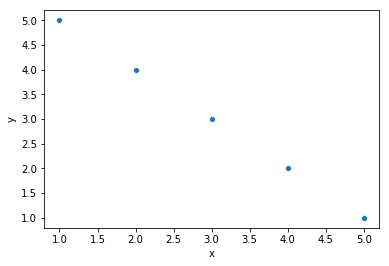

In [115]:
sns.scatterplot(x = 'x', y = 'y',data = df)

# 2.4 Обучение ирисового дерева

In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_iris = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv", index_col=0)
test_iris = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv", index_col=0)

In [4]:
X_train = train_iris.drop(["species"], axis=1)
y_train = train_iris.species
X_test = test_iris.drop(["species"], axis=1)
y_test = test_iris.species
scores_data = pd.DataFrame(columns={"max_depth", "test", "train"});

In [5]:
rs = np.random.seed(0) 
max_depth_values = range(1,100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    tmp_score_data = pd.DataFrame({'max_depth': [max_depth], 'test': [test_score], 'train': [train_score]})
    scores_data = scores_data.append(tmp_score_data, sort=True)

In [6]:
scores_data_melt = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train', 'test'], 
                    var_name=['set_type'], value_name='score')

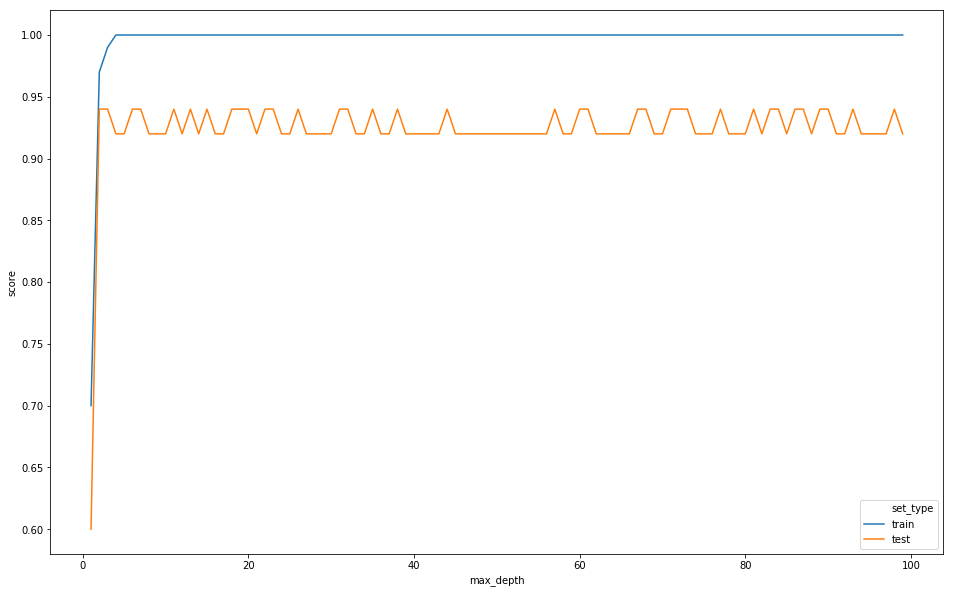

In [7]:
plt.figure(figsize=(16, 10))
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_melt)

# 2.4 Коты собаки

In [91]:
dog_cat = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
test = pd.read_json('dataset_209691_15-4.txt')

In [94]:
import bamboolib

In [95]:
dog_catThe 4

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
5,26,31.2,1,0,0,собачка
6,20,24.0,1,1,0,собачка
7,23,27.6,1,1,0,собачка
8,21,25.2,1,1,0,собачка
9,28,33.6,1,1,0,собачка


In [37]:
X_test = test

In [7]:
dog_cat.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [9]:
X = dog_cat.drop(columns={'Вид'})
y = dog_cat['Вид']

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [11]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
clf.score(X, y)

1.0

In [42]:
pred = pd.Series(clf.predict(X_test))
pred.value_counts()

котик      53
собачка    47
dtype: int64

# 2.5  Песни


In [44]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

In [45]:
pd_test = pd.read_csv('https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2


# 2.7 

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)
predicted = dt.predict(x_test)

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
x = iris.data
y = iris.target
dt = DecisionTreeClassifier()
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10), 'min_samples_split': range(2,10), 'min_samples_leaf': range(1,10)}

search = GridSearchCV(dt, param_grid=parametrs, cv=5)
search.fit(x,y)
best_tree = search.best_estimator_

In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
x = iris.data
y = iris.target
dt = DecisionTreeClassifier()
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10), 'min_samples_split': range(2,10), 'min_samples_leaf': range(1,10)}

search = RandomizedSearchCV(dt, param_distributions=parametrs)
search.fit(x,y)
best_tree = search.best_estimator_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [49]:
best_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')